In [3]:
%matplotlib widget
# other options for matplotlib are: `widget`, `ipympl`, `notebook`

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

In [28]:
column_names = ['atom', 'x', 'y', 'z']
# sI_Reference.xyz
# si_co2/co2_rand_relaxed.xyz
# si_ch4/methane_relaxed.xyz
df = pd.read_csv('/Users/nicksmits/chee494/reference_files/sI_Reference.xyz',
                 sep='\s+',
                 names=column_names,
                 skiprows=2)
# the `sep='\s+` is necessary because I want to use whitespace
# as the separator and not just `sep=" "`

In [29]:
df

,atom,x,y,z
0,O,0.000000,0.000000,3.006056
1,O,0.000000,0.000000,9.023943
2,O,0.000000,2.320827,1.421946
3,O,0.000000,2.320827,10.608054
4,O,0.000000,9.709172,1.421946
...,...,...,...,...
133,H,7.697636,3.195408,5.240990
134,H,5.549800,8.346895,6.032925
135,H,4.332364,8.834591,6.789010
136,H,7.979980,7.547020,6.010308


In [30]:
# Get the oxygen atoms only that for the cage 
oxygen_df = df[df['atom'] == 'O']
hydrogen_df = df[df['atom'] == 'H']

# oxygen_df = oxygen_df.sample(frac=1)

oxygen_df

,atom,x,y,z
0,O,0.000000,0.000000,3.006056
1,O,0.000000,0.000000,9.023943
2,O,0.000000,2.320827,1.421946
3,O,0.000000,2.320827,10.608054
4,O,0.000000,9.709172,1.421946
5,O,0.000000,9.709172,10.608054
6,O,6.015000,3.006056,0.000000
7,O,6.015000,9.023943,0.000000
8,O,6.015000,1.421946,2.320827
9,O,6.015000,10.608054,2.320827


In [31]:
# Plot 3D atoms point clouds

# fig = plt.figure(figsize=plt.figaspect(0.5))
# ax = fig.add_subplot(1, 2, 1, projection='3d')

# # Plot all atoms
# ax.scatter(df['x'], df['y'], df['z'],
#            marker='o',
#            s=100)
# ax = fig.add_subplot(1, 2, 2, projection='3d')

# # Plot oxgygens only 
# ax.scatter(oxygen_df['x'], oxygen_df['y'], oxygen_df['z'],
#             marker='o',
#             s=100, 
#             c='r')
# plt.show()

In [32]:
def dist(P, Q):
    return np.sqrt((P[0]-Q[0])**2 + (P[1]-Q[1])**2 + (P[2]-Q[2])**2)

In [33]:
def angle_vec(P, Q, R):
    P = np.array(P)
    Q = np.array(Q)
    R = np.array(R)

    PQ = Q - P
    QR = R - Q

    dot_product = np.dot(PQ, QR)
    norm_PQ = np.linalg.norm(PQ)
    norm_QR = np.linalg.norm(QR)

    return np.degrees(np.arccos(dot_product / (norm_PQ * norm_QR)))

In [34]:
def angle_plane(P, Q, R, S):
    P = np.array(P, dtype='float64')
    Q = np.array(Q, dtype='float64')
    R = np.array(R, dtype='float64')
    S = np.array(S, dtype='float64')

    PQ = Q - P
    PR = R - P
    PS = S - P

    normal_1 = np.cross(PQ, PR)
    norm_1 = np.linalg.norm(normal_1)

    normal_2 = np.cross(PR, PS)
    norm_2 = np.linalg.norm(normal_2)

    dot_product = np.dot(normal_1, normal_2)

    return np.degrees(np.arccos(dot_product / (norm_1 * norm_2)))

In [43]:
# Known HBond atoms
oxygen_df.iloc[20]
oxygen_df.iloc[30][:]

atom           O
x       9.766676
y       8.317302
z        2.20967
Name: 30, dtype: object

In [48]:
hydrogen_df.iloc[25][:]

atom           H
x        3.19577
y       4.320935
z       0.770281
Name: 71, dtype: object

In [49]:
print(dist(oxygen_df.iloc[12][1:], hydrogen_df.iloc[25][1:]))

0.9571497480410814


In [12]:
# Ball park HBond / FIVE_RING_TOL / SIX_RING_TOL Dist value 
Q_idx = 60 # --> Left Atom
P_idx = 37 # --> Middle Atom
R_idx = 34 # --> Right Atom
S_idx = 56 # --> Right Right Atom

# Distance between P and Q --> For HBOND_DIST
dist(oxygen_df.iloc[S_idx][1:], oxygen_df.iloc[R_idx][1:])

# Ratio 1->3/1->2 of distances --> For FIVE_RING_TOL 
dist(oxygen_df.iloc[Q_idx][1:], oxygen_df.iloc[R_idx][1:]) / dist(oxygen_df.iloc[P_idx][1:], oxygen_df.iloc[Q_idx][1:])

# Ratio 1->4/1->2 of distances --> For SIX_RING_TOL
dist(oxygen_df.iloc[P_idx][1:], oxygen_df.iloc[S_idx][1:]) / dist(oxygen_df.iloc[P_idx][1:], oxygen_df.iloc[Q_idx][1:])

# Angle between P, Q, R --> For FIVE_ANGLE_TOL or SIX_ANGLE_TOL
angle_vec(oxygen_df.iloc[P_idx][1:], oxygen_df.iloc[Q_idx][1:], oxygen_df.iloc[R_idx][1:])

# Angle between two planes P, Q, R and P, R, S --> For PLANE_CUTOFF
# angle_plane(oxygen_df.iloc[Q_idx][1:], oxygen_df.iloc[P_idx][1:], oxygen_df.iloc[R_idx][1:], oxygen_df.iloc[S_idx][1:])

145.55936450492794

In [13]:
# Constants
HBOND_DIST = 2.6
HBOND_DIST_TOL = 0.3 # 0.75
FIVE_RING_TOL = 0.2
FIVE_ANGLE_TOL = 40 # Degrees
SIX_RING_TOL = 0.2
SIX_ANGLE_TOL = 40 # Degrees
PLANE_TILT_CUTOFF = 45 # Degrees (45 in paper)
CAGE_HEIGHT = 6.015
CAGE_HEIGHT_TOL = 0.2
CAGE_BASE_TILT_TOL = 0.1

# Output Params
aspect_ratio = [1, 1, 1] # Aspect ratio for output graphs

class Graph:
    def __init__(self, verticies): # input a dataframe with 0 = index, 1,2,3 = x,y,z
        # Create all verticies and find neighbours for each vertex
        self.verticies = []
        for i in range(len(verticies)):
            self.verticies.append(self.Vertex(
                i, 
                verticies.iloc[i][1], ### CHANGE THIS (hardcoding is bad)
                verticies.iloc[i][2],
                verticies.iloc[i][3]
            ))
        
        # Populate neighbours for each vertex
        for vertex in self.verticies:
            vertex.populate_neighbours(self.verticies)

        self.closeable = False # Closeable ring flag

        self.five_ring = [] # Temporary variable for 5 membered rings
        self.five_ring_list = [] # List of 5 membered rings

        self.six_ring = [] # Temporary variable for 6 membered rings
        self.six_ring_list = [] # List of 6 membered rings

        self.cup_6_1_5_6_list = [] # List of 6_1_5_12 cups

        self.cage_6_2_5_12_list = [] # List of 6_2_5_12 cages

    # Function to find all rings, cups, and cages
    def find_all(self):
        for i in range(len(self.verticies)):
            self.fiveDFSRingFinder(i, 0)
            self.add_ring_to_matrix(i)
            self.clear()

        for i in range(len(self.verticies)):
            self.sixDFSRingFinder(i, 0)
            self.add_ring_to_matrix(i)
            self.clear()

        self.five_find_neighbouring_five_rings()
        self.six_find_neighbouring_five_rings()

        self.find_6_1_5_6_cups()
        self.find_6_2_5_12_cages()
    
    # Print a summary of the search 
    def summary(self):
        print("Summary:")
        print("Rings:")
        print("\t 5 membered rings: " + str(len(self.five_ring_list)))
        print("\t 6 membered rings: " + str(len(self.six_ring_list)))
        print("Cups:")
        print("\t 6_1_5_12 cups: " + str(len(self.cup_6_1_5_6_list)))
        print("Cages:")
        print("\t 6_2_5_12 cages: " + str(len(self.cage_6_2_5_12_list)))

    ## Recurvise depth-first search for PENTAGONAL rings
    def fiveDFSRingFinder(self, start_index, itter):
        # Get the vertex from the list of all verticies in the graph
        vertex = self.verticies[start_index]
        vertex.visited = True

        # Check if the current sequence of 3 points in already in a ring, if so, don't continue
        if itter >= 2:
            for ring in self.five_ring_list:
                for i in range(5):
                    if i == 3: # Edge case
                        if {vertex, vertex.predecessor, vertex.predecessor.predecessor} == {ring.verticies[i], ring.verticies[i+1], ring.verticies[0]}:
                            return
                    elif i == 4: # Edge case
                        if {vertex, vertex.predecessor, vertex.predecessor.predecessor} == {ring.verticies[i], ring.verticies[0], ring.verticies[1]}:
                            return
                    else:
                        if {vertex, vertex.predecessor, vertex.predecessor.predecessor} == {ring.verticies[i], ring.verticies[i+1], ring.verticies[i+2]}:
                            return
            
            vec_theta = self.calc_vec_angle(vertex)
            if abs(vec_theta - 108) > FIVE_ANGLE_TOL:
                return

        if itter >= 3:
            plane_theta = self.calc_plane_angle(vertex)
            if plane_theta > PLANE_TILT_CUTOFF:
                return

        # Check if the sequence of 4 points (formed on the 3rd itteration) is closeable via a 5th point
        if itter == 3:
            # If any of the starting point's neighbours are neighbours of the current vertex's 3rd predecessor, the ring is closed
            for starting_point_neighbour in vertex.predecessor.predecessor.predecessor.neighbours:
                if vertex.is_neighbour(starting_point_neighbour):
                    # print("Close ring: " + str(starting_point_neighbour.index) + ": (" + str(starting_point_neighbour.x) + ", " + str(starting_point_neighbour.y) + ", " + str(starting_point_neighbour.z) + ")")
                    self.closeable = True
                    self.five_ring.append(starting_point_neighbour)
                    return
                
        if not self.closeable: # Only run if the ring has not been closed (to avoid uneccesary computation)
            # Loop through each neighbour of the current vertex 
            for neighbour in vertex.neighbours:
                # print(itter)
                if not neighbour.visited and itter < 4 and not self.closeable:
                    # print(str(neighbour.index) + ": (" + str(neighbour.x) + ", " + str(neighbour.y) + ", " + str(neighbour.z) + ")")

                    # The neighbour's predecessor is now the current vertex (used for backtracing)
                    neighbour.predecessor = vertex

                    # Check the second vertex in the sequence is 1.6 times the HBond distance from the starting point R(i, i+2) = 1.6*a
                    if itter >= 2:
                        if abs(1.6*vertex.dist(neighbour) - neighbour.dist(neighbour.predecessor.predecessor)) < FIVE_RING_TOL:
                            self.fiveDFSRingFinder(neighbour.index, itter + 1) # Recursion
                            if self.closeable:
                                self.five_ring.append(neighbour) # Only add to the ring variable if it is closable            
                    else:
                        if neighbour.neighbours is not None:
                            self.fiveDFSRingFinder(neighbour.index, itter + 1) # Recursion
                        if self.closeable:
                            self.five_ring.append(neighbour)

    ## Recurvise depth-first search for HEXAGONAL rings
    def sixDFSRingFinder(self, start_index, itter):
        # Get the vertex from the list of all verticies in the graph
        vertex = self.verticies[start_index]
        vertex.visited = True

        # Check if the current sequence of 3 points in already in a ring, if so, don't continue
        if itter >= 2:
            for ring in self.six_ring_list:
                for i in range(6):
                    if i == 4: # Edge case
                        if {vertex, vertex.predecessor, vertex.predecessor.predecessor} == {ring.verticies[i], ring.verticies[i+1], ring.verticies[0]}:
                            return
                    elif i == 5: # Edge case
                        if {vertex, vertex.predecessor, vertex.predecessor.predecessor} == {ring.verticies[i], ring.verticies[0], ring.verticies[1]}:
                            return
                    else:
                        if {vertex, vertex.predecessor, vertex.predecessor.predecessor} == {ring.verticies[i], ring.verticies[i+1], ring.verticies[i+2]}:
                            return
            
            vec_theta = self.calc_vec_angle(vertex)
            if abs(vec_theta - 120) > SIX_ANGLE_TOL:
                return
        
        if itter >= 3:
            plane_theta = self.calc_plane_angle(vertex)
            if plane_theta > PLANE_TILT_CUTOFF:
                return

        # Check if the sequence of 4 points (formed on the 3rd itteration) is closeable via a 5th point
        if itter == 4:
            # If any of the starting point's neighbours are neighbours of the current vertex's 3rd predecessor, the ring is closed
            for starting_point_neighbour in vertex.predecessor.predecessor.predecessor.predecessor.neighbours:
                if vertex.is_neighbour(starting_point_neighbour):
                    # print("Close ring: " + str(starting_point_neighbour.index) + ": (" + str(starting_point_neighbour.x) + ", " + str(starting_point_neighbour.y) + ", " + str(starting_point_neighbour.z) + ")")
                    self.closeable = True
                    self.six_ring.append(starting_point_neighbour)
                    return
                
        if not self.closeable: # Only run if the ring has not been closed (to avoid uneccesary computation)
            # Loop through each neighbour of the current vertex 
            for neighbour in vertex.neighbours: 
                # print(itter)
                if not neighbour.visited and itter < 5 and not self.closeable:
                    # print(str(neighbour.index) + ": (" + str(neighbour.x) + ", " + str(neighbour.y) + ", " + str(neighbour.z) + ")")

                    # The neighbour's predecessor is now the current vertex (used for backtracing)
                    neighbour.predecessor = vertex

                    # Check the third vertex in the sequence is 2 times the HBond distance from the starting point R(i, i+2) = 1.6*a
                    if itter >= 3:
                        if abs(2*vertex.dist(neighbour) - neighbour.dist(neighbour.predecessor.predecessor.predecessor)) < SIX_RING_TOL:
                            self.sixDFSRingFinder(neighbour.index, itter + 1) # Recursion
                            if self.closeable:
                                self.six_ring.append(neighbour) # Only add to the ring variable if it is closable
                    else:
                        if neighbour.neighbours is not None:
                            self.sixDFSRingFinder(neighbour.index, itter + 1) # Recursion
                        if self.closeable:
                            self.six_ring.append(neighbour) # Only add to the ring if it is closeable

    # Function to calculate the angle between two vectors based on 3 consecutive points
    def calc_vec_angle(self, vertex):
        P = np.array([vertex.predecessor.predecessor.x, vertex.predecessor.predecessor.y, vertex.predecessor.predecessor.z])
        Q = np.array([vertex.predecessor.x, vertex.predecessor.y, vertex.predecessor.z])    
        R = np.array([vertex.x, vertex.y, vertex.z])

        QP = P - Q
        norm_QP = np.linalg.norm(QP)
        QR = R - Q
        norm_QR = np.linalg.norm(QR)

        theta = np.degrees(np.arccos(np.dot(QP, QR) / (norm_QP * norm_QR)))
        return theta

    # Function to calculate the angle between two planes based on 3 consecutive points
    def calc_plane_angle(self, vertex):
        P = np.array([vertex.predecessor.predecessor.predecessor.x, vertex.predecessor.predecessor.predecessor.y, vertex.predecessor.predecessor.predecessor.z])
        Q = np.array([vertex.predecessor.predecessor.x, vertex.predecessor.predecessor.y, vertex.predecessor.predecessor.z])    
        R = np.array([vertex.predecessor.x, vertex.predecessor.y, vertex.predecessor.z])
        S = np.array([vertex.x, vertex.y, vertex.z])

        PQ = Q - P
        PR = R - P
        normal_1 = np.cross(PQ, PR)
        norm_1 = np.linalg.norm(normal_1)

        PR = R - P
        PS = S - P
        normal_2 = np.cross(PR, PS)
        norm_2 = np.linalg.norm(normal_2)

        theta = np.degrees(np.arccos(np.dot(normal_1, normal_2) / (norm_1 * norm_2)))
        return theta

    def clear(self):
        # Reset graph to default
        self.closeable = False # No longer closeable
        for vertex in self.verticies: 
            vertex.predeccesor = None # Remove vertext predecessor 'memory'
            vertex.visited = False
            # random.shuffle(vertex.neighbours) # Shuffle the neighbors list of the vertex


    def add_ring_to_matrix(self, start_index):
        # If we have found a ring (len = 4 since we don't add the start index to the list in DFS)
        if len(self.five_ring) == 4:
            self.five_ring.append(self.verticies[start_index]) # Add the starting O2 to the list
            # print("full")

            self.five_ring_list.append(self.Ring(self.five_ring))

            self.five_ring = [] # Reset the ring list
            
        # If we have found a ring (len = 5 since we don't add the start index to the list in DFS)
        elif len(self.six_ring) == 5:
            self.six_ring.append(self.verticies[start_index])
            # print("full")

            self.six_ring_list.append(self.Ring(self.six_ring))

            self.six_ring = [] # Reset the ring list
            
        # Reset the ring lists if no ring is found
        else:
            self.five_ring = []
            self.six_ring = []


    def six_find_neighbouring_five_rings(self):
        # For each hexagonal ring, find neighbouring pentagonal rings
        for hex_ring in self.six_ring_list:
            for pent_ring in self.five_ring_list:  
                for i in range(6): 
                    for j in range(5):
                        if i == 5 and j == 4:
                            if {hex_ring.verticies[i], hex_ring.verticies[0]} == {pent_ring.verticies[j], pent_ring.verticies[0]}: 
                                hex_ring.neighbouring_rings.add(pent_ring)
                                pent_ring.neighbouring_rings.add(hex_ring)
                                hex_ring.coordination += 1
                                pent_ring.coordination += 1
                        elif i == 5:
                            if {hex_ring.verticies[i], hex_ring.verticies[0]} == {pent_ring.verticies[j], pent_ring.verticies[j+1]}: 
                                hex_ring.neighbouring_rings.add(pent_ring)
                                pent_ring.neighbouring_rings.add(hex_ring)
                                hex_ring.coordination += 1
                                pent_ring.coordination += 1
                        elif j == 4:
                            if {hex_ring.verticies[i], hex_ring.verticies[i+1]} == {pent_ring.verticies[j], pent_ring.verticies[0]}: 
                                hex_ring.neighbouring_rings.add(pent_ring)
                                pent_ring.neighbouring_rings.add(hex_ring)
                                hex_ring.coordination += 1
                                pent_ring.coordination += 1
                        else:
                            if {hex_ring.verticies[i], hex_ring.verticies[i+1]} == {pent_ring.verticies[j], pent_ring.verticies[j+1]}: 
                                hex_ring.neighbouring_rings.add(pent_ring)
                                pent_ring.neighbouring_rings.add(hex_ring)
                                hex_ring.coordination += 1
                                pent_ring.coordination += 1

    # Function to find all of the neighbours of each pentagonal ring
    def five_find_neighbouring_five_rings(self):
        # For each pentagonal ring, find neighbouring pentagonal rings
        for i in range(len(self.five_ring_list) - 1):
            for j in range(i + 1, len(self.five_ring_list)):
                for k in range(5):
                    for l in range(5):
                        if k == 4 and l == 4:
                            if {self.five_ring_list[i].verticies[k], self.five_ring_list[i].verticies[0]} == {self.five_ring_list[j].verticies[l], self.five_ring_list[j].verticies[0]}: 
                                self.five_ring_list[i].neighbouring_rings.add(self.five_ring_list[j])
                                self.five_ring_list[j].neighbouring_rings.add(self.five_ring_list[i])
                                self.five_ring_list[i].coordination += 1
                                self.five_ring_list[j].coordination += 1
                        elif k == 4:
                            if {self.five_ring_list[i].verticies[k], self.five_ring_list[i].verticies[0]} == {self.five_ring_list[j].verticies[l], self.five_ring_list[j].verticies[l+1]}: 
                                self.five_ring_list[i].neighbouring_rings.add(self.five_ring_list[j])
                                self.five_ring_list[j].neighbouring_rings.add(self.five_ring_list[i])
                                self.five_ring_list[i].coordination += 1
                                self.five_ring_list[j].coordination += 1
                        elif l == 4:
                            if {self.five_ring_list[i].verticies[k], self.five_ring_list[i].verticies[k+1]} == {self.five_ring_list[j].verticies[l], self.five_ring_list[j].verticies[0]}: 
                                self.five_ring_list[i].neighbouring_rings.add(self.five_ring_list[j])
                                self.five_ring_list[j].neighbouring_rings.add(self.five_ring_list[i])
                                self.five_ring_list[i].coordination += 1
                                self.five_ring_list[j].coordination += 1
                        else:
                            if {self.five_ring_list[i].verticies[k], self.five_ring_list[i].verticies[k+1]} == {self.five_ring_list[j].verticies[l], self.five_ring_list[j].verticies[l+1]}: 
                                self.five_ring_list[i].neighbouring_rings.add(self.five_ring_list[j])
                                self.five_ring_list[j].neighbouring_rings.add(self.five_ring_list[i])
                                self.five_ring_list[i].coordination += 1
                                self.five_ring_list[j].coordination += 1


    # Find 6_1_5_6 rings. 1 fully coordinated hexagon with 5 pentagons, each of the pentagons share an edge with the hexagon and 2 other pentagons
    def find_6_1_5_6_cups(self):
        for hex_ring in self.six_ring_list:
            if hex_ring.coordination >= 6: # If the hexagon is fully coordinated
                # print("Fully coordinated hexagon found")
                # hex_ring.print_ring()
                hex_ring.visited = True
                for pent_ring in hex_ring.neighbouring_rings: # For each neighbouring pentagon
                    stack = [(pent_ring, 0)] # Add the pentagon to the stack with a depth of 0
                    skip = False
                    # Itterative depth first search
                    while stack: 
                        current_ring, depth = stack.pop()
                        current_ring.visited = True
                        # print(f"Visited node at depth {depth}")
                        # current_ring.print_ring()
                        
                        if not skip:
                            # Check if the current ring is already in a cup
                            if depth == 0 and self.cup_6_1_5_6_list:
                                for cup_6_1_5_6 in self.cup_6_1_5_6_list:
                                    if current_ring in cup_6_1_5_6.rings:
                                        skip = True # Don't continue if the ring is already in a cup
                                        break
                        
                            if depth > 4: # At a depth of 4, we are on the 5th pentagon
                                # print("check")
                                if current_ring.predecessor.predecessor.predecessor.predecessor.predecessor in current_ring.neighbouring_rings:# Check if the 5th ring is the root, then we have a 6_1_5_12 cup
                                    # print("FOUND")
                                    self.cup_6_1_5_6_list.append(self.Cup([hex_ring,
                                                                            current_ring.predecessor.predecessor.predecessor.predecessor.predecessor, 
                                                                            current_ring.predecessor.predecessor.predecessor.predecessor, 
                                                                            current_ring.predecessor.predecessor.predecessor, 
                                                                            current_ring.predecessor.predecessor, 
                                                                            current_ring.predecessor,
                                                                            current_ring])) # Add the cup to the list
                                    break
                                    
                            for ring in current_ring.neighbouring_rings: # DFS
                                if not ring.visited and ring.is_neighbour_of(hex_ring): # Ring needs to be a neighbour of the hexagon
                                    if current_ring.predecessor is not None:
                                        if ring.neighbour_orientation(hex_ring) == current_ring.predecessor.neighbour_orientation(hex_ring): # Ring needs to be on the same side of the hexagon as the previous ring
                                            ring.predecessor = current_ring
                                            stack.append((ring, depth + 1)) # Add the ring to the stack with a depth of 1 greater than the current ring
                                    else:
                                        ring.predecessor = current_ring
                                        stack.append((ring, depth + 1))
                    
                    for ring in self.five_ring_list:    
                        ring.clear()


    # TODO: Make more reliable 
    # Finds 6_2_5_12 cages. Cages are two cups, where each of the pentagonal rings on one cup have 2 neighbouring pentagonal rings on another cup
    def find_6_2_5_12_cages(self):
        for i in range(len(self.cup_6_1_5_6_list) - 1):
            cup_1 = self.cup_6_1_5_6_list[i]
            for j in range(i, len(self.cup_6_1_5_6_list)):
                common_edge_count = 0
                cup_2 = self.cup_6_1_5_6_list[j]
                if np.isclose(np.dot(cup_1.oriented_normal, (-1)*cup_2.oriented_normal), 1, rtol=CAGE_BASE_TILT_TOL) and cup_1.base != cup_2.base:
                    if abs(cup_1.base_centroid().dist(cup_2.base_centroid()) - CAGE_HEIGHT) < CAGE_HEIGHT_TOL:
                        for k in range(1, len(cup_1.rings)):
                            for j in range(1, len(cup_2.rings)):
                                if cup_1.rings[k].is_neighbour_of(cup_2.rings[j]):
                                    common_edge_count += 1
                        # print(common_edge_count)
                        if common_edge_count == 12:
                            self.cage_6_2_5_12_list.append(self.Cage([cup_1, cup_2]))                                       

    def print_rings(self):
        # Print all rings
        count = 0
        for ring in self.five_ring_list:
            count += 1
            print("PENT RING " + str(count))
            for vertex in ring.verticies:
                print(str(vertex.index) + ": (" + str(vertex.x) + ", " + str(vertex.y) + ", " + str(vertex.z) + ")")
            print("\n")

        count = 0
        for ring in self.six_ring_list:
            count += 1
            print("HEX RING " + str(count))
            for vertex in ring.verticies:
                print(str(vertex.index) + ": (" + str(vertex.x) + ", " + str(vertex.y) + ", " + str(vertex.z) + ")")
            print("\n")

    def plot_rings(self):
        fig = plt.figure(figsize=plt.figaspect(0.5))
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.set_box_aspect(aspect_ratio) 
        # ax.set_proj_type('ortho')  # Use orthographic projection for faster rendering

        for ring in self.five_ring_list:
            vertices = np.array([[vertex.x, vertex.y, vertex.z] for vertex in ring.verticies])
            ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                        marker='o',
                        s=100,
                        c='r',
                        alpha=1.0)  # Set alpha to 1.0 for solid colors
        
        for ring in self.six_ring_list:
            vertices = np.array([[vertex.x, vertex.y, vertex.z] for vertex in ring.verticies])
            ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                        marker='o',
                        s=100,
                        c='b',
                        alpha=1.0)  # Set alpha to 1.0 for solid colors
        plt.show()

    def plot_these_rings(self, rings):
        fig = plt.figure(figsize=plt.figaspect(0.5))
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.set_box_aspect(aspect_ratio) 
        # ax.set_proj_type('ortho')  # Use orthographic projection for faster rendering

        for ring in rings:
            vertices = np.array([[vertex.x, vertex.y, vertex.z] for vertex in ring.verticies])
            ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                        marker='o',
                        s=100,
                        c='r')
        plt.show()
            
    def print_cups(self):
        # Print all cups
        count = 0
        for cup in self.cup_6_1_5_6_list:
            count += 1
            print("CUP " + str(count))
            for ring in cup.rings:
                ring.print_ring()
            print("\n")

    def plot_cups(self):
        fig = plt.figure(figsize=plt.figaspect(0.5))
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.set_box_aspect(aspect_ratio) 
        ax.set_proj_type('ortho')  # Use orthographic projection for faster rendering
        for cup in self.cup_6_1_5_6_list:
            for ring in cup.rings:
                vertices = np.array([[vertex.x, vertex.y, vertex.z] for vertex in ring.verticies])
                ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                            marker='o',
                            s=100,
                            c='r')
            base_vertices = np.array([[vertex.x, vertex.y, vertex.z] for vertex in cup.base.verticies])
            ax.scatter(base_vertices[:, 0], base_vertices[:, 1], base_vertices[:, 2],
                        marker='o',
                        s=100,
                        c='b')
        plt.show()

    def print_cages(self):
        # Print all cages
        count = 0
        for cage in self.cage_6_2_5_12_list:
            count += 1
            print("CAGE " + str(count))
            cage.print_cage()
            cage.plot_cage()
    
    def plot_cages(self):
        fig = plt.figure(figsize=plt.figaspect(0.5))
        ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax.set_box_aspect(aspect_ratio) 
        ax.set_proj_type('ortho')  # Use orthographic projection for faster rendering

        for cage in self.cage_6_2_5_12_list:
            for cup in cage.cups:
                for ring in cup.rings:
                    vertices = np.array([[vertex.x, vertex.y, vertex.z] for vertex in ring.verticies])
                    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                               marker='o',
                               s=100,
                               c='r')
                base_vertices = np.array([[vertex.x, vertex.y, vertex.z] for vertex in cup.base.verticies])
                ax.scatter(base_vertices[:, 0], base_vertices[:, 1], base_vertices[:, 2],
                           marker='o',
                           s=100,
                           c='b')
        plt.show()    

    class Cage():
        def __init__(self, cups):
            self.cups = cups

        def print_cage(self):
            print("CAGE")
            for cup in self.cups:
                cup.print_cup()
            print("\n")

        def plot_cage(self):
            fig = plt.figure(figsize=plt.figaspect(0.5))
            ax = fig.add_subplot(1, 1, 1, projection='3d')
            ax.set_box_aspect(aspect_ratio)  
            ax.set_proj_type('ortho')  # Use orthographic projection for faster rendering

            for cup in self.cups:
                for ring in cup.rings:
                    vertices = np.array([[vertex.x, vertex.y, vertex.z] for vertex in ring.verticies])
                    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2],
                               marker='o',
                               s=100,
                               c='r')
                base_vertices = np.array([[vertex.x, vertex.y, vertex.z] for vertex in cup.base.verticies])
                ax.scatter(base_vertices[:, 0], base_vertices[:, 1], base_vertices[:, 2],
                           marker='o',
                           s=100,
                           c='b')
            plt.show()

    class Cup():
        def __init__(self, rings):
            self.rings = rings #List of 1 hexagon (frist) and 5 pentagons
            self.base = rings[0]
            
            # Find the normal of the cup oriented with respect to its neighbours
            self.oriented_normal = self.rings[1].neighbour_orientation(self.base, return_oriented_normal=True)

        def base_centroid(self):
            x = 0
            y = 0
            z = 0
            for vertex in self.base.verticies:
                x += vertex.x
                y += vertex.y
                z += vertex.z
            return Graph.Vertex(0, x/6, y/6, z/6)
         
        def print_cup(self):
            print("CUP")
            for ring in self.rings:
                ring.print_ring()
            print("\n")

        # Makes a new plot of just the atoms in the cup
        def plot_cup(self):
            fig = plt.figure(figsize=plt.figaspect(0.5))
            ax = fig.add_subplot(1, 1, 1, projection='3d')

            # Plot all atoms
            for ring in self.rings:
                for vertex in ring.verticies:
                    ax.scatter(vertex.x, vertex.y, vertex.z,
                            marker='o',
                            s=100,
                            c='r') # Red for the pentagons
            for vertex in self.base.verticies:
                ax.scatter(vertex.x, vertex.y, vertex.z,
                            marker='o',
                            s=100,
                            c='b') # blue for the hexagon base
            plt.show()

    class Ring():
        def __init__(self, verticies):
            self.verticies = verticies
            self.num_verticies = len(verticies)
            self.neighbouring_rings = set()
            self.coordination = 0
            self.visited = False
            self.predecessor = None

        # Finds and returns which side of the plane of the hexagon this ring is on.
        def neighbour_orientation(self, base_ring, return_oriented_normal=False):
            P = np.array([base_ring.verticies[0].x, base_ring.verticies[0].y, base_ring.verticies[0].z])
            Q = np.array([base_ring.verticies[1].x, base_ring.verticies[1].y, base_ring.verticies[1].z])
            R = np.array([base_ring.verticies[5].x, base_ring.verticies[5].y, base_ring.verticies[5].z])
            hex_vec_1 = Q - P
            hex_vec_2 = R - P
            hex_normal = np.cross(hex_vec_1, hex_vec_2)

            for vertex in self.verticies:
                if vertex not in base_ring.verticies:
                    N = np.array([vertex.x, vertex.y, vertex.z])
                    if return_oriented_normal:
                        return (hex_normal * np.sign(np.dot(hex_normal, N - P)))/np.linalg.norm(hex_normal)
                    return np.sign(np.dot(hex_normal, N - P))
            
        def print_neighbouring_rings(self):
            count = 0
            for ring in self.neighbouring_rings:
                count += 1
                print("NEIGHBOURING RING: " + str(count))
                for vertex in ring.verticies:
                    print(str(vertex.index) + ": (" + str(vertex.x) + ", " + str(vertex.y) + ", " + str(vertex.z) + ")")
                print("\n")

        def is_neighbour_of(self, ring):
            if self in ring.neighbouring_rings:
                return True

        def clear(self):
            self.visited = False
            self.predecessor = None
        
        def equals(self, ring):
            if set(self.verticies) == set(ring.verticies):
                return True
            return False
        
        def print_ring(self):
            for vertex in self.verticies:
                print(str(vertex.index) + ": (" + str(vertex.x) + ", " + str(vertex.y) + ", " + str(vertex.z) + ")")
            print("\n") 

        def plot_ring(self):
            fig = plt.figure(figsize=plt.figaspect(0.5))
            ax = fig.add_subplot(1, 1, 1, projection='3d')
            
            ax.set_xlim([0, 10])
            ax.set_ylim([0, 10])
            ax.set_zlim([0, 10])

            for vertex in self.verticies:
                ax.scatter(vertex.x, vertex.y, vertex.z,
                            marker='o',
                            s=100,
                            c='r')
            plt.show()

    class Vertex:
        def __init__(self, i, x, y, z):
            self.index = i # Particle index in the xyz file 
            self.x = x 
            self.y = y
            self.z = z
            
            self.visited = False # Visited var
            
            self.neighbours = [] # List of first neighbours (array of Vertex objects)
            self.num_neighbours = 0
            
            self.predecessor = None # Predecessor for backtracking

        def populate_neighbours(self, verticies): # Takes in a list of verticies
            count = 0
            # For every vertex, find its neighbours
            for vertex in verticies:
                if self == vertex:
                    continue
                if self.is_neighbour(vertex):
                    # self.neighbours.add(vertex)
                    self.neighbours.append(vertex)
                    count += 1
            # random.shuffle(self.neighbours) # Avoids bias in DFS (trying to avoid the same path being taken from the same vertex ... I think)
            self.num_neighbours = count
        
        def is_neighbour(self, Q):
            # If the current vertex (self) and the vertex Q are the toleranced HBond distance apart, they are neighbours
            if (abs(self.dist(Q) - HBOND_DIST) < HBOND_DIST_TOL):
                return True 
            return False 

        def dist(self, Q):
            # Simple euclidean distance calculation
            return np.sqrt((self.x-Q.x)**2 + (self.y-Q.y)**2 + (self.z-Q.z)**2) 
        

In [14]:
# Initialise the graph
g = Graph(oxygen_df)

In [15]:
# Find all PENTAGONAL and HEXAGONAL rings
# for i in range(len(oxygen_df)):
#     # Find all pentagonal rings
#     g.fiveDFSRingFinder(i, 0)
#     g.add_ring_to_matrix(i)
#     g.clear()

#     # Find all hexagonal rings
#     g.sixDFSRingFinder(i, 0)
#     g.add_ring_to_matrix(i) 
#     g.clear()

# # Print all unique rings 
# g.print_rings()

# Find all rings
g.find_all()
g.summary()

print("Num PENT rings : " + str(len(g.five_ring_list)))
print("Num HEX rings : " + str(len(g.six_ring_list)))

Summary:
Rings:
	 5 membered rings: 20
	 6 membered rings: 1
Cups:
	 6_1_5_12 cups: 2
Cages:
	 6_2_5_12 cages: 0
Num PENT rings : 20
Num HEX rings : 1


In [52]:
def find_h20_hydrogens(graph, hydrogen_df):
    DELTA = 1.0
    data = []
    for ring in graph.five_ring_list:
        for vertex in ring.verticies:
            for i in range(len(hydrogen_df)): ## key error
                vert = [vertex.x, vertex.y, vertex.z]
                tmp = [hydrogen_df.iloc[i, 1], hydrogen_df.iloc[i, 2], hydrogen_df.iloc[i, 3]]
                if abs(dist(vert, tmp)) < DELTA:
                    row = {'atom': "H", 'x': hydrogen_df.iloc[i, 1], 'y': hydrogen_df.iloc[i, 2], 'z': hydrogen_df.iloc[i, 3]}
                    data.append(row)

    out_df = pd.DataFrame(data)
    return out_df
reduced_hydrogen_df = find_h20_hydrogens(g, hydrogen_df)
print(reduced_hydrogen_df)

14.516861977170015
14.602060810019445
4.306142869878045
5.358252730416608
12.870301115358238
14.041569499349269
15.08979555229686
13.895843221750388
2.9269592600733034
3.2473947148895634
6.17825007445728
7.383066588753527
11.123156007328516
11.632111223188836
7.240091499137855
5.913614071672921
10.323506145049883
9.963217004099812
4.049634060293365
4.980724654774842
11.574060395767654
12.44382668131689
7.574392277576809
7.129755240103588
7.179567179837323
7.627246337358796
6.019984747525377
7.676638314273159
10.812487660165337
1.3555787374585724
11.001892304667509
10.636166669245215
7.958376772806362
8.001699044623944
9.275997951621392
9.482024677849251
4.271147066654171
3.7377022869511562
5.3427486292953015
5.864209332442594
9.514852011944424
8.48975628065166
2.8928375070061634
2.60243246559533
10.319265519972024
9.362697859642157
4.01266472910859
5.319312511930049
11.804160738461881
10.437885215729406
11.063447557043563
10.457497550024598
8.306988926128257
7.676969310703346
9.7070315

In [53]:
def make_output_file(filename, graph, h_df, out_type="rings"):
    # Add the file extension if it is not already
    if not filename.endswith(".xyz"):
        filename += ".xyz"

    match out_type:
        case "rings":
            O_atoms = []
            for ring in graph.five_ring_list:
                for vertex in ring.verticies:
                    O_atoms.append(["O", vertex.x, vertex.y, vertex.z])
            for ring in graph.six_ring_list:
                for vertex in ring.verticies:
                    O_atoms.append(["O", vertex.x, vertex.y, vertex.z])
        case "cups":
            O_atoms = []
            for cup in graph.cup_6_1_5_6_list:
                for ring in cup.rings:
                    for vertex in ring.verticies:
                        O_atoms.append(["O", vertex.x, vertex.y, vertex.z])
        case "cages":
            O_atoms = []
            for cage in graph.cage_6_2_5_12_list:
                for cup in cage.cups:
                    for ring in cup.rings:
                        for vertex in ring.verticies:
                            O_atoms.append(["O", vertex.x, vertex.y, vertex.z])

    O_atoms = [list(atom) for atom in set(tuple(atom) for atom in O_atoms)]
    H_atoms = h_df.values.tolist()
    num_atoms = len(O_atoms) + len(h_df)

    # Write the output to a file
    with open(filename, 'w') as file:
        file.write(f"{num_atoms}\n") 
        # How do I find the lattic constant? Do I even need it?
        file.write(f"sI: {num_atoms} water molecules, lattice constant a = 12.03\n")
        
        for vertex in H_atoms:
            file.write(f"{vertex[0]} {vertex[1]} {vertex[2]} {vertex[3]}\n")

        for vertex in O_atoms:
            file.write(f"{vertex[0]} {vertex[1]} {vertex[2]} {vertex[3]}\n")
        

In [54]:
make_output_file("sI_Reference_cages_out.xyz", g, reduced_hydrogen_df, out_type="cages")

In [55]:
# # Find neighbouring pentagonal rings for each hexagonal ring
# g.six_find_neighbouring_five_rings()

# # Find neighbouring pentagonal rings for each pentagonal ring
# g.five_find_neighbouring_five_rings() 


In [424]:
# ring_index = 1

# g.six_ring_list[ring_index].print_neighbouring_rings()

In [425]:
# g.find_6_1_5_6_cups()

In [426]:
# print("Num Cups:" + str(len(g.cup_6_1_5_6_list)))

In [427]:
# list(g.six_ring_list[1].neighbouring_rings)[5].neighbour_orientation(g.six_ring_list[1])

In [428]:
g.six_ring_list[0].coordination

12

In [429]:
# g.cup_6_1_5_6_list[4].plot_cup()

In [430]:
# g.find_6_2_5_12_cages()
# print("Num Cages: " + str(len(g.cage_6_2_5_12_list)))

In [431]:
# g.cage_6_2_5_12_list[0].plot_cage()

In [432]:
# g.cup_6_1_5_6_list[0].base_centroid().dist(g.cup_6_1_5_6_list[2].base_centroid())

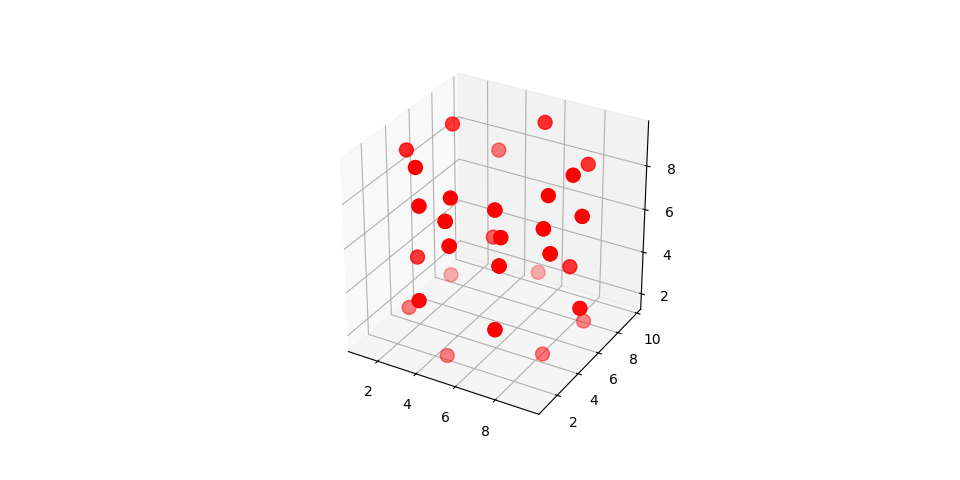

In [433]:
six_idx = 0
five_idx = 1

# g.six_ring_list[six_idx].print_ring()
# g.six_ring_list[six_idx].plot_ring()

# g.five_ring_list[five_idx].print_ring()
# g.five_ring_list[five_idx].plot_ring()

# g.plot_these_rings([g.six_ring_list[six_idx], g.five_ring_list[five_idx]])
g.plot_these_rings(g.six_ring_list[0].neighbouring_rings)

# angle_plane([g.five_ring_list[idx].verticies[0].x, g.five_ring_list[idx].verticies[0].y, g.five_ring_list[idx].verticies[0].z],
#             [g.five_ring_list[idx].verticies[1].x, g.five_ring_list[idx].verticies[1].y, g.five_ring_list[idx].verticies[1].z],
#             [g.five_ring_list[idx].verticies[2].x, g.five_ring_list[idx].verticies[2].y, g.five_ring_list[idx].verticies[2].z],
#             [g.five_ring_list[idx].verticies[3].x, g.five_ring_list[idx].verticies[3].y, g.five_ring_list[idx].verticies[3].z])


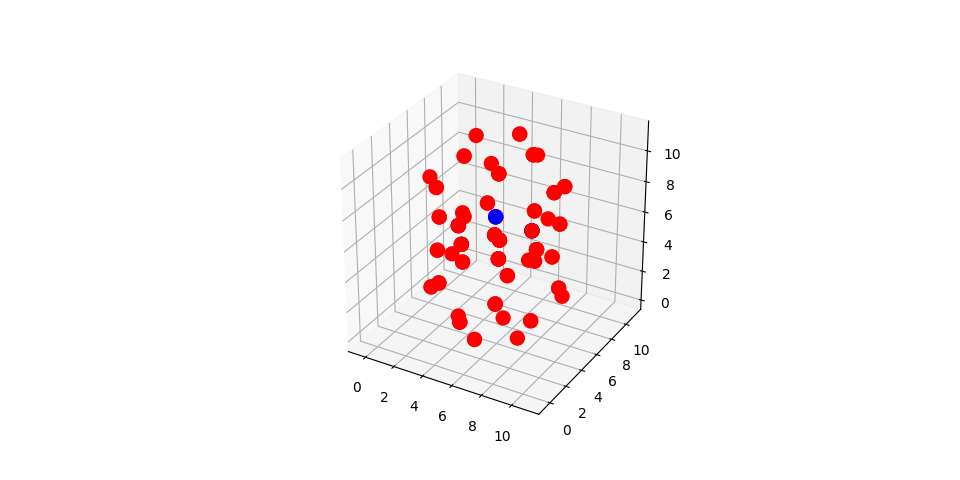

In [434]:
g.plot_rings()

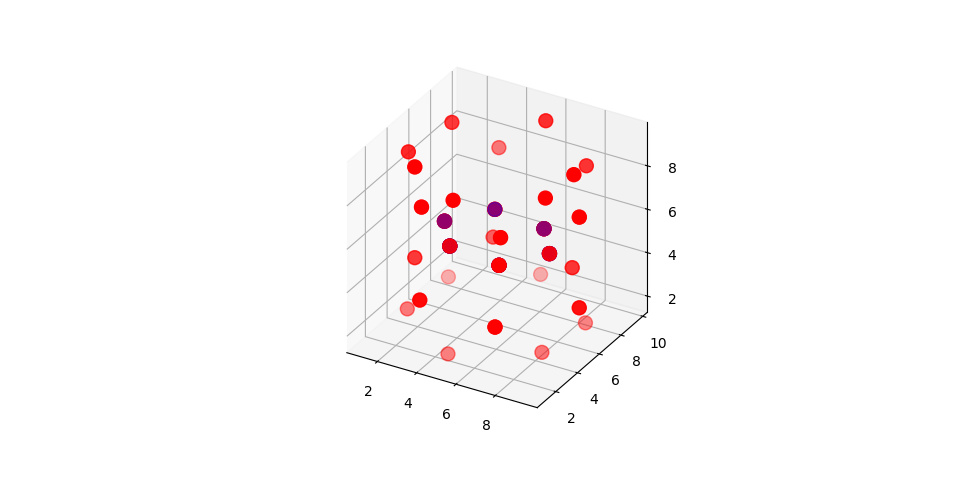

In [435]:
g.plot_cups()

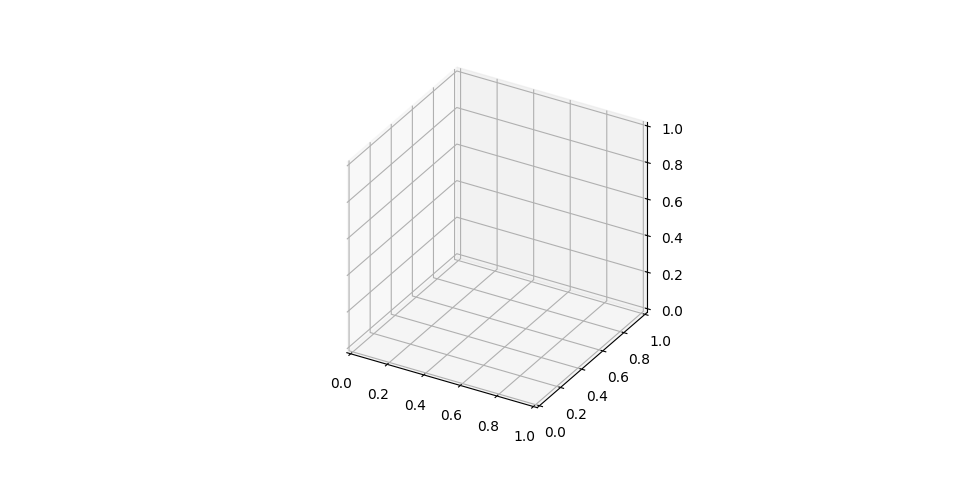

In [436]:
g.plot_cages()